In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4, 3)

In [2]:
#load the file and set the first column as the index
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\Assignment 1\diamonds.csv",index_col = 0)

In [3]:
train.head()

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train.shape, "\n")
print ("Column Headers:", list(train.columns.values), "\n")
print (train.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (53940, 10) 

Column Headers: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'] 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


So there are 53940 number of observations and 10 different variables.

The different kind of variables are : 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'

In [5]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'carat' has 273 unique values
~~Listing up to 10 unique values~~
[ 0.23  0.21  0.29  0.31  0.24  0.26  0.22  0.3   0.2   0.32]

-----------------------------------------------------------------------

'cut' has 5 unique values
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

-----------------------------------------------------------------------

'color' has 7 unique values
['E' 'I' 'J' 'H' 'F' 'G' 'D']

-----------------------------------------------------------------------

'clarity' has 8 unique values
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']

-----------------------------------------------------------------------

'depth' has 184 unique values
~~Listing up to 10 unique values~~
[ 61.5  59.8  56.9  62.4  63.3  62.8  62.3  61.9  65.1  59.4]

-----------------------------------------------------------------------

'table' has 127 unique values
~~Listing up to 10 unique values~~
[ 55.  61.  65.  58.  57.  56.  54.  62.  59.  63.]

----------------------

In [6]:
# Check for duplicate index or rows
idsUnique = len(set(train.index))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 53940 total entries


##### Descriptive Statistics

In [7]:
#get summary of numerical variables
train.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

We can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.
It looks that Price is skewed

In [8]:
# Skewness of the distribution

print(train.skew())

# Values close to 0 show less skew
# The attributes are not skewed too much. Some algos may benefit if skew is corrected

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64


In [9]:
# Skewness of the distribution

print(train.kurt())

#Since kurtosis measures peakedness, 
#we'd expect the flat (uniform) distribution have low kurtosis while the distributions
#with sharper peaks should have higher kurtosis.

carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64


###### We have 'x','y','z' as 0. let us check how many are there and deal with the outliers


In [10]:
#Check when a value in a cloumn is zero
train[(train['z'] == 0)].count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
dtype: int64

In [11]:
#Separate carat and price
df = train[['carat','price']]

In [12]:
df.head()

carat  price
1   0.23    326
2   0.21    326
3   0.23    327
4   0.29    334
5   0.31    335

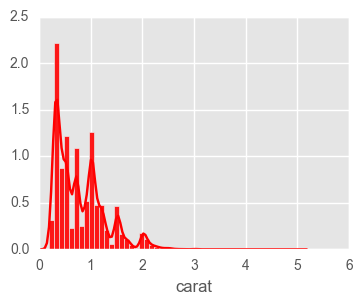

In [13]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df['carat'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

We see immediately that the carat weights are positively skewed: most diamonds are around 1 carat or below but there are extreme cases of larger diamonds.
The plot above has fairly wide bins and there doesn't appear to be any data beyond a carat size of 3.5. We can make try to get more out of hour histogram by adding some additional arguments to control the size of the bins and limits of the x-axis:

##### Boxplots
Boxplots are another type of univariate plot for summarizing distributions of numeric data graphically. Let's make a boxplot of carat using the pd.boxplot() function:

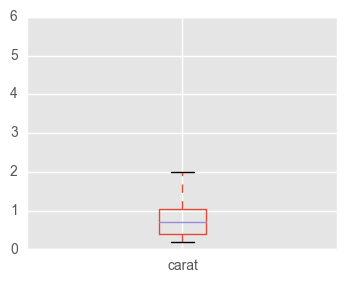

In [14]:
train.boxplot(column="carat")

the central box of the boxplot represents the middle 50% of the observations, the central bar is the median and the bars at the end of the dotted lines (whiskers) encapsulate the great majority of the observations. Circles that lie beyond the end of the whiskers are data points that may be outliers.
In this case, our data set has over 50,000 observations and we see many data points beyond the top whisker. We probably wouldn't want to classify all of those points as outliers, but the handful of diamonds at 4 carats and above are definitely far outside the norm.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D33CDD9390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D33CE8E048>]], dtype=object)

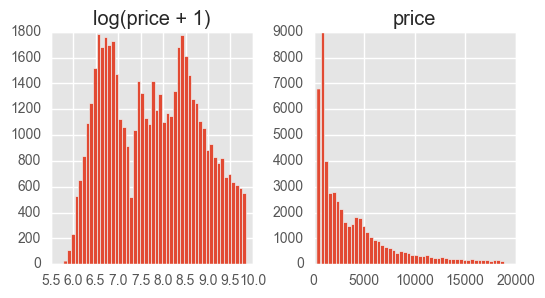

In [15]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
prices = pd.DataFrame({"price":train["price"], "log(price + 1)":np.log1p(train["price"])})
prices.hist(bins = 50)

This is a long tail distribution, with a high concentration of observations below the U$5,000 mark. The distribution is right-skewed with small amounts of very large prices driving up the mean, while the median remains a more robust measure of the center of the distribution.

We can see that the data show some evidence of bomiodality on the scale of log10 scale. So there are two different kind of diamonds available for richer and porer buyers. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D33CF55FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D33D122BA8>]], dtype=object)

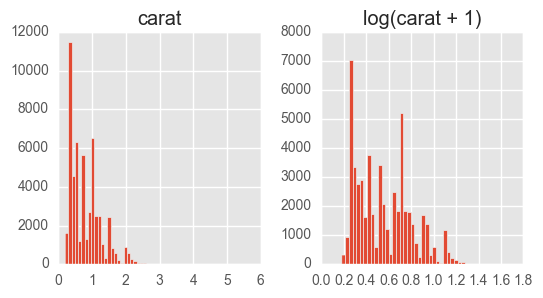

In [16]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
carat = pd.DataFrame({"carat":train["carat"], "log(carat + 1)":np.log1p(train["carat"])})
carat.hist(bins = 50)

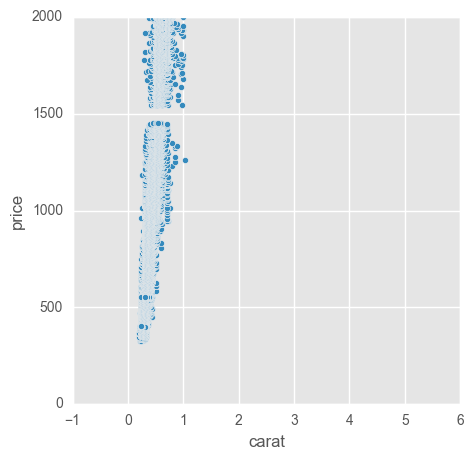

In [17]:
train.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(5,5),
              ylim=(0,2000))  

It is a non-linear relationship and dispersion(variance) of the relationship also increases as carat size increases. Even though size/weight of the diamond set is a critical factor , the relationship is non-linear. Therefore, running a linear model will be a bad idea.

##### Density Plots
A density plot shows the distribution of a numeric variable with a continuous curve. It is similar to a histogram but without discrete bins, a density plot gives a better picture of the underlying shape of a distribution. Create a density plot with series.plot(kind="density")

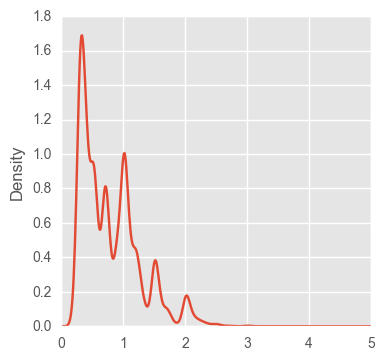

In [18]:
df["carat"].plot(kind="density",  # Create density plot
                      figsize=(4,4),    # Set figure size
                      xlim= (0,5))      # Limit x axis values

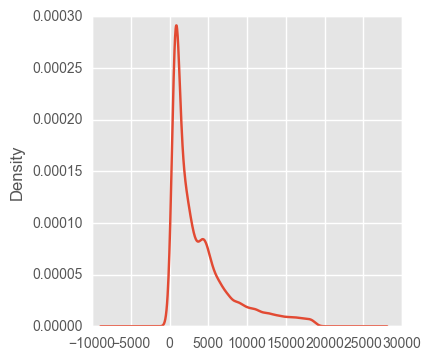

In [19]:
df["price"].plot(kind="density",  # Create density plot
                      figsize=(4,4))    # Set figure size
                      

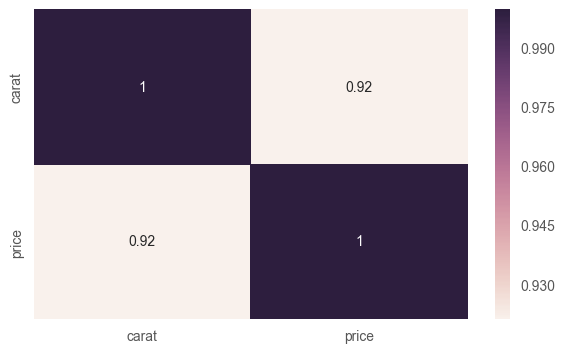

In [20]:
correlationMatrix = df.corr().abs()

plt.subplots(figsize=(7, 4))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

The above plot show 92% correlation between price and carat. It's up to us if we should consider this correlation % as a damaging level. Usually, correlation above 80% (subjective) is considered higher, hence, we will not forego this combination.

### Linear Regression

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between price and carat")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'price ~ carat', data=df).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between price and carat
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Fri, 11 Aug 2017   Prob (F-statistic):               0.00
Time:                        22:50:59   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------

Dep. variable is the name of the response variable

No. of observations show the valid observations

F-statistics is 3.041e+05 and Prob(F-statistics is very small. Hence we can reject the null hypothesis. )

Parameter estimates : Intercept and carat therefore

<b>price = -2256.3606 + 7756.4256 * carat</b>

p>|t| is the pearson value for explanotory variables... when 0.000 p < 0.001

R-squared value : proportion of the variance. such as 84.9 % variance in the dataset.

•	Intercept - This is the βo value. It's the prediction made by model when all the independent variables are set to zero.

•	Estimate - This represents regression coefficients for respective variables. It's the value of slope. Let's interpret it for Chord_Length. We can say, when Chord_Length is increased by 1 unit, holding other variables constant, Sound_pressure_level decreases by a value of -35.69.

•	Std. Error - This determines the level of variability associated with the estimates. Smaller the standard error of an estimate is, more accurate will be the predictions.

•	t value - t statistic is generally used to determine variable significance, i.e. if a variable is significantly adding information to the model. t value > 2 suggests the variable is significant. I used it as an optional value as the same information can be extracted from the p value.

•	p value - It's the probability value of respective variables determining their significance in the model. p value < 0.05 is always desirable.


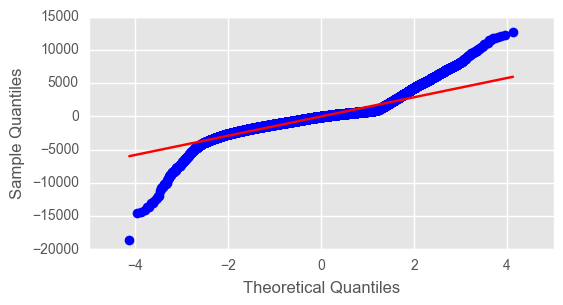

In [22]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

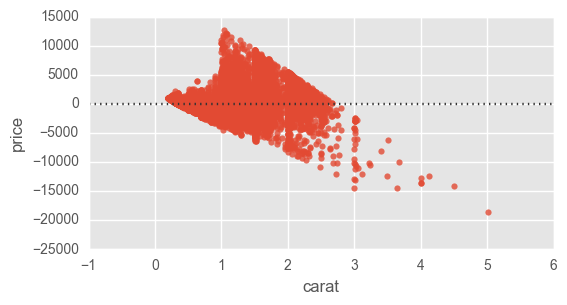

In [23]:
# simple plot of residuals
sns.residplot('carat','price', data=df)

Among all, Residual vs. Fitted value catches my attention. Not exactly though, but I see signs of heteroskedasticity in this data. Remember funnel shape? You can see a similar pattern. To overcome this situation, we'll build another model with log(y).

In [24]:
df['log_price'] = np.log(1 + df.price)
df['log_carat'] = np.log(1 + df.carat)

In [25]:
df.head()

carat  price  log_price  log_carat
1   0.23    326   5.789960   0.207014
2   0.21    326   5.789960   0.190620
3   0.23    327   5.793014   0.207014
4   0.29    334   5.814131   0.254642
5   0.31    335   5.817111   0.270027

In [26]:
print ("OLS regression model for the association between price and carat")
# reg_log is the model name , followed by equal sign.

reg_log = smf.ols(formula = 'log_price ~ carat', data=df).fit()
# print the result
print (reg_log.summary())

OLS regression model for the association between price and carat
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 2.983e+05
Date:                Fri, 11 Aug 2017   Prob (F-statistic):               0.00
Time:                        22:51:01   Log-Likelihood:                -26685.
No. Observations:               53940   AIC:                         5.337e+04
Df Residuals:                   53938   BIC:                         5.339e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------

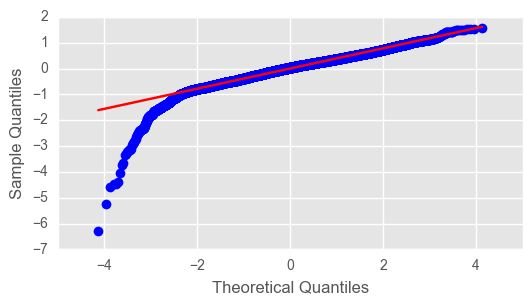

In [27]:
#Q-Q plot for normality
fig4=sm.qqplot(reg_log.resid, line='r')

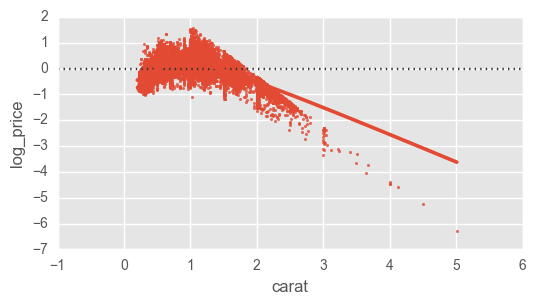

In [28]:
sns.residplot('carat','log_price', data=df,lowess= True, scatter_kws={"s": 5})

The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

But unfortunately this creates a plot of residuals vs the x values. I think in many situations, this graph will tell you the same thing as residuals versus fitted values, but it is not what I was looking for. Here is how to create it with vanilla matplotlib:

http://jeffmax.io/using-python-for-statistics-coursework.html

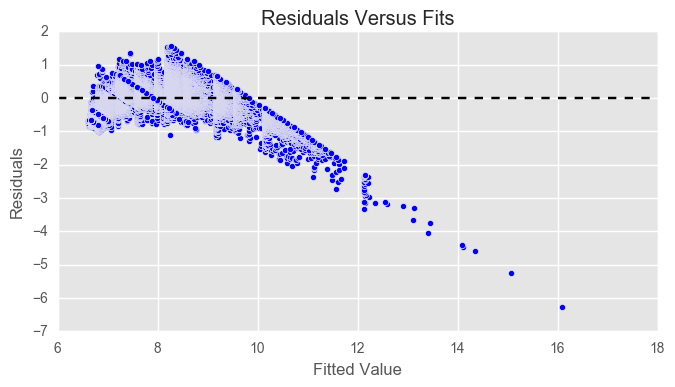

In [29]:
fitted = 6.2164 + 1.9688*df["carat"] # This just needs to be whatever the linear regrsssion equation is
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.0, 1.0]) 
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)
axes.set_xlabel('Fitted Value')
axes.set_ylabel('Residuals')
axes.set_title('Residuals Versus Fits')
axes.scatter(fitted, df["log_price"]  - fitted, marker = "o")

#### ANOVA for linear regression

In [30]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

model = ols('log_price ~ carat', data=df)
anova_lm(model.fit())

df        sum_sq       mean_sq              F  PR(>F)
carat         1.0  46977.568051  46977.568051  298297.137856     0.0
Residual  53938.0   8494.469923      0.157486            NaN     NaN

Read more 

http://www.stat.yale.edu/Courses/1997-98/101/anovareg.htm

In [31]:
help(anova_lm)

Help on function anova_lm in module statsmodels.stats.anova:

anova_lm(*args, **kwargs)
    ANOVA table for one or more fitted linear models.
    
    Parameters
    ----------
    args : fitted linear model results instance
        One or more fitted linear models
    scale : float
        Estimate of variance, If None, will be estimated from the largest
        model. Default is None.
    test : str {"F", "Chisq", "Cp"} or None
        Test statistics to provide. Default is "F".
    typ : str or int {"I","II","III"} or {1,2,3}
        The type of ANOVA test to perform. See notes.
    robust : {None, "hc0", "hc1", "hc2", "hc3"}
        Use heteroscedasticity-corrected coefficient covariance matrix.
        If robust covariance is desired, it is recommended to use `hc3`.
    
    Returns
    -------
    anova : DataFrame
    A DataFrame containing.
    
    Notes
    -----
    Model statistics are given in the order of args. Models must have
    been fit using the formula api.
    
   

One often first encounters the term "analysis of variance" when the predictor is categorical, so that you're fitting the model
y=α+βi
y=α+βi
where ii identifies which category is the value of the predictor. If there are kk categories, you'd get k−1k−1 degrees of freedom in the numerator in the F-statistic, and usually n−kn−k degrees of freedom in the denominator. But the distinction between regression and analysis of variance is still the same for this kind of model.

https://stats.stackexchange.com/questions/34616/difference-between-regression-analysis-and-analysis-of-variance

###### We have two tunnel shape in our plot. Below we select diamonds which are below the mean carat and see if the model is little better

In [33]:
df_low_carat = df[df["carat"]< 0.75]

In [36]:
print ("OLS regression model for the association between price and carat")
# reg_log is the model name , followed by equal sign.

reg_log_low = smf.ols(formula = 'log_price ~ carat', data=df_low_carat).fit()
# print the result
print (reg_log_low.summary())

OLS regression model for the association between price and carat
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.337e+05
Date:                Fri, 11 Aug 2017   Prob (F-statistic):               0.00
Time:                        22:55:36   Log-Likelihood:                -24.378
No. Observations:               30034   AIC:                             52.76
Df Residuals:                   30032   BIC:                             69.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------

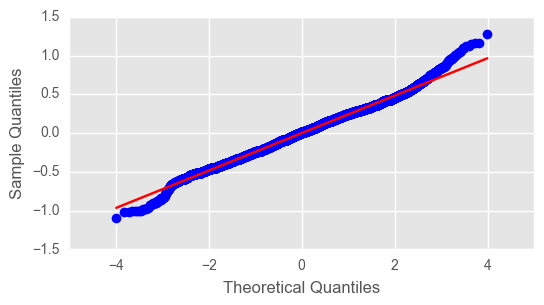

In [37]:
#Q-Q plot for normality
fig4=sm.qqplot(reg_log_low.resid, line='r')

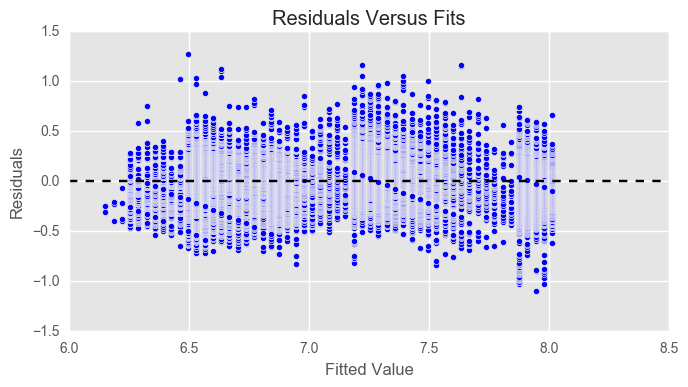

In [45]:
fitted = 5.4605 + 3.4493*df_low_carat["carat"] # This just needs to be whatever the linear regrsssion equation is
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.0, 1.0]) 
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)
axes.set_xlabel('Fitted Value')
axes.set_ylabel('Residuals')
axes.set_title('Residuals Versus Fits')
axes.scatter(fitted, df_low_carat["log_price"]  - fitted, marker = "o")

In [ ]:
Hope this post clarifies some of the 